# Mechanism of Missing Data

1- Missing Completely At Random(MCAR)

2- Missing At Random(MAR)

3- Not Missing At Random (NMAR) or Missing Not At Random(MNAR)

# 1- Missing Completely At Random(MCAR)

MCAR means that missingness has the same correlation with all the categories of other features in the data. For example, when we take a random sample from a population, each member has an equal chance of being included. MCAR is the unobserved data of individuals in the population who were not included in the sample. this gives us the most confidencence that we are not systemattically missing from some of our respondents.

# 2- Missing At Random(MAR)

MAR means there may be systematic disparities between missing and observed values, but these can be explained totally by other observed variables. For example, when we pick a smaple from a population and the likelihood of inclusion is determined by some known property. Modern methods for missing data generally start from the MAR assumption.

# 3- Not Missing At Random (NMAR) or Missing Not At Random(MNAR)

NMAR means that missingness is due to unknown reasons and cannot be explained by any other variable in the data. For example, when we pick a sample from a population that is not representative to the overall population, like some minorities are not included in the population. this is the most challenging case for handling missingness, as one strategy to handle it would be to do what-if analyses for different scenarios or collect data can explain the cause of missingness.



# Reading and understanding data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max.columns', None)
pd.set_option('display.max.rows', None)

In [ ]:
data=pd.read_csv('accident_data.csv')
data.head()

,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Control,Junction_Detail,Latitude,Light_Conditions,Local_Authority_(District),Local_Authority_(Highway),Location_Easting_OSGR,Location_Northing_OSGR,Longitude,LSOA_of_Accident_Location,Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,InScotland
0,200501BS00001,A,3218.0,NaN,0.0,Serious,None,04/01/2005,Tuesday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.489096,NaN,Kensington and Chelsea,Kensington and Chelsea,525680.0,178240.0,-0.191170,E01002849,1,1,0.0,1.0,Metropolitan Police,Wet or damp,Single carriageway,None,30.0,17:42,Urban,Raining no high winds,2005.0,No
1,200501BS00002,B,450.0,C,0.0,Slight,None,05/01/2005,Wednesday,1.0,Auto traffic signal,Crossroads,51.520075,Darkness - lights lit,Kensington and Chelsea,Kensington and Chelsea,524170.0,181650.0,-0.211708,E01002909,1,1,0.0,5.0,Metropolitan Police,Dry,Dual carriageway,None,30.0,17:36,Urban,Fine no high winds,2005.0,No
2,200501BS00003,C,0.0,NaN,0.0,Slight,None,06/01/2005,Thursday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.525301,Darkness - lights lit,Kensington and Chelsea,Kensington and Chelsea,524520.0,182240.0,-0.206458,E01002857,1,2,0.0,0.0,Metropolitan Police,Dry,Single carriageway,None,30.0,00:15,Urban,Fine no high winds,2005.0,No
3,200501BS00004,A,3220.0,NaN,0.0,Slight,None,07/01/2005,Friday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.482442,NaN,Kensington and Chelsea,Kensington and Chelsea,526900.0,177530.0,-0.173862,E01002840,1,1,0.0,0.0,Metropolitan Police,Dry,Single carriageway,None,30.0,10:35,Urban,Fine no high winds,2005.0,No
4,200501BS00005,NaN,0.0,NaN,0.0,Slight,None,10/01/2005,Monday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.495752,Darkness - lighting unknown,Kensington and Chelsea,Kensington and Chelsea,528060.0,179040.0,-0.156618,E01002863,1,1,0.0,0.0,Metropolitan Police,Wet or damp,Single carriageway,None,30.0,21:13,Urban,Fine no high winds,2005.0,No


Quick view of the head of the data:

In [ ]:
data.head(10)

,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Control,Junction_Detail,Latitude,Light_Conditions,Local_Authority_(District),Local_Authority_(Highway),Location_Easting_OSGR,Location_Northing_OSGR,Longitude,LSOA_of_Accident_Location,Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,InScotland
0,200501BS00001,A,3218.0,NaN,0.0,Serious,None,04/01/2005,Tuesday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.489096,NaN,Kensington and Chelsea,Kensington and Chelsea,525680.0,178240.0,-0.191170,E01002849,1,1,0.0,1.0,Metropolitan Police,Wet or damp,Single carriageway,None,30.0,17:42,Urban,Raining no high winds,2005.0,No
1,200501BS00002,B,450.0,C,0.0,Slight,None,05/01/2005,Wednesday,1.0,Auto traffic signal,Crossroads,51.520075,Darkness - lights lit,Kensington and Chelsea,Kensington and Chelsea,524170.0,181650.0,-0.211708,E01002909,1,1,0.0,5.0,Metropolitan Police,Dry,Dual carriageway,None,30.0,17:36,Urban,Fine no high winds,2005.0,No
2,200501BS00003,C,0.0,NaN,0.0,Slight,None,06/01/2005,Thursday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.525301,Darkness - lights lit,Kensington and Chelsea,Kensington and Chelsea,524520.0,182240.0,-0.206458,E01002857,1,2,0.0,0.0,Metropolitan Police,Dry,Single carriageway,None,30.0,00:15,Urban,Fine no high winds,2005.0,No
3,200501BS00004,A,3220.0,NaN,0.0,Slight,None,07/01/2005,Friday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.482442,NaN,Kensington and Chelsea,Kensington and Chelsea,526900.0,177530.0,-0.173862,E01002840,1,1,0.0,0.0,Metropolitan Police,Dry,Single carriageway,None,30.0,10:35,Urban,Fine no high winds,2005.0,No
4,200501BS00005,NaN,0.0,NaN,0.0,Slight,None,10/01/2005,Monday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.495752,Darkness - lighting unknown,Kensington and Chelsea,Kensington and Chelsea,528060.0,179040.0,-0.156618,E01002863,1,1,0.0,0.0,Metropolitan Police,Wet or damp,Single carriageway,None,30.0,21:13,Urban,Fine no high winds,2005.0,No
5,200501BS00006,NaN,0.0,NaN,0.0,Slight,None,11/01/2005,Tuesday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.515540,NaN,Kensington and Chelsea,Kensington and Chelsea,524770.0,181160.0,-0.203238,E01002832,1,2,0.0,0.0,Metropolitan Police,Wet or damp,Single carriageway,Oil or diesel,30.0,12:40,Urban,Raining no high winds,2005.0,No
6,200501BS00007,C,0.0,Unclassified,0.0,Slight,None,13/01/2005,Thursday,1.0,Give way or uncontrolled,T or staggered junction,51.512695,Darkness - lights lit,Kensington and Chelsea,Kensington and Chelsea,524220.0,180830.0,-0.211277,E01002875,1,2,0.0,0.0,Metropolitan Police,Dry,Single carriageway,None,30.0,20:40,Urban,Fine no high winds,2005.0,No
7,200501BS00009,A,315.0,NaN,0.0,Slight,None,14/01/2005,Friday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.502260,NaN,Kensington and Chelsea,Kensington and Chelsea,525890.0,179710.0,-0.187623,E01002889,2,1,0.0,0.0,Metropolitan Police,Dry,Dual carriageway,None,30.0,17:35,Urban,Fine no high winds,2005.0,No
8,200501BS00010,A,3212.0,B,304.0,Slight,None,15/01/2005,Saturday,1.0,Auto traffic signal,Crossroads,51.483420,Darkness - lights lit,Kensington and Chelsea,Kensington and Chelsea,527350.0,177650.0,-0.167342,E01002900,2,2,0.0,5.0,Metropolitan Police,Dry,Single carriageway,None,30.0,22:43,Urban,Fine no high winds,2005.0,No
9,200501BS00011,B,450.0,C,0.0,Slight,None,15/01/2005,Saturday,1.0,Give way or uncontrolled,T or staggered junction,51.512443,NaN,Kensington and Chelsea,Kensington and Chelsea,524550.0,180810.0,-0.206531,E01002875,5,2,0.0,8.0,Metropolitan Police,Dry,Single carriageway,None,30.0,16:00,Urban,

Quick view of tail of the data :

In [ ]:
data.tail()

,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Control,Junction_Detail,Latitude,Light_Conditions,Local_Authority_(District),Local_Authority_(Highway),Location_Easting_OSGR,Location_Northing_OSGR,Longitude,LSOA_of_Accident_Location,Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,InScotland
508472,200743P209127,A,34.0,A,34.0,Slight,None,14/12/2007,Friday,1.0,Give way or uncontrolled,Slip road,51.759622,Daylight,Vale of White Horse,Oxfordshire,448670.0,207010.0,-1.296237,E01028742,1,2,0.0,0.0,Thames Valley,Dry,Dual carriageway,None,50.0,14:37,Rural,Fine no high winds,2007.0,No
508473,200743P210027,NaN,129.0,Unclassified,0.0,Slight,None,16/02/2007,Friday,1.0,Give way or uncontrolled,T or staggered junction,51.899209,Daylight,Cherwell,Oxfordshire,458410.0,222640.0,-1.152495,E01028468,1,1,0.0,0.0,Thames Valley,Dry,Single carriageway,None,30.0,15:45,Urban,Fine no high winds,2007.0,No
508474,200743P210037,B,4477.0,NaN,0.0,Slight,None,16/03/2007,Friday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.773696,Daylight,West Oxfordshire,Oxfordshire,430020.0,208430.0,-1.566323,E01028766,1,2,0.0,0.0,Thames Valley,Dry,Single carriageway,None,60.0,13:32,Rural,Fine no high winds,2007.0,No
508475,200743P210077,Motorway,40.0,NaN,0.0,Slight,None,12/07/2007,Thursday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.751941,Daylight,South Oxfordshire,Oxfordshire,461850.0,206300.0,-1.105420,E01028647,1,1,0.0,0.0,Thames Valley,Dry,Dual carriageway,None,70.0,17:41,Rural,Fine no high winds,2007.0,No
508476,200743P210087,NaN,272.0,Unclassified,0.0,Slight,None,16/08/2007,Thursday,2.0,Give way or uncontrolled,Crossroads,51.897413,Daylight,Cherwell,Oxfordshire,460910.0,222470.0,-1.116195,E01028499,1,2,0.0,0.0,Thames Valley,Dry,Single,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Quick view of a random sample from the data:

In [ ]:
data.sample(10)

,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Control,Junction_Detail,Latitude,Light_Conditions,Local_Authority_(District),Local_Authority_(Highway),Location_Easting_OSGR,Location_Northing_OSGR,Longitude,LSOA_of_Accident_Location,Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,InScotland
141693,2.00544E+12,B,3349.0,NaN,0.0,Fatal,None,24/12/2005,Saturday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.179731,Daylight,East Hampshire,Hampshire,470790.0,142770.0,-0.988637,E01022604,1,2,0.0,0.0,Hampshire,Dry,Single carriageway,None,60.0,14:30,Rural,Fine no high winds,2005.0,No
15885,200501RY10066,C,0.0,C,0.0,Slight,None,03/02/2005,Thursday,1.0,Give way or uncontrolled,T or staggered junction,51.464102,Darkness - lights lit,Bexley,Bexley,549400.0,176100.0,0.149339,E01000327,1,2,0.0,0.0,Metropolitan Police,Dry,Single carriageway,None,30.0,20:00,Urban,Fine no high winds,2005.0,No
20121,200501TX20777,A,3005.0,Unclassified,0.0,Slight,None,20/12/2005,Tuesday,1.0,Give way or uncontrolled,T or staggered junction,51.476973,Daylight,Hounslow,Hounslow,513730.0,176610.0,-0.363737,E01002640,1,2,0.0,1.0,Metropolitan Police,Dry,Single carriageway,None,30.0,13:40,Urban,Fine no high winds,2005.0,No
436037,2.0071E+12,A,1.0,NaN,0.0,Slight,None,21/09/2007,Friday,1.0,Data missing or out of range,Not at junction or within 20 metres,55.006491,Daylight,Newcastle upon Tyne,Newcastle upon Tyne,421370.0,568040.0,-1.667407,E01008293,1,4,0.0,0.0,Northumbria,Wet or damp,Dual carriageway,None,70.0,07:56,Urban,Raining no high winds,2007.0,No
222000,200601YR90771,A,105.0,Unclassified,0.0,Slight,None,09/10/2006,Monday,1.0,Give way or uncontrolled,Crossroads,51.598350,Daylight,Haringey,Haringey,530940.0,190530.0,-0.110881,E01002098,4,2,0.0,0.0,Metropolitan Police,Dry,Single carriageway,None,30.0,10:56,Urban,Fine no high winds,2006.0,No
194696,200597KA00702,A,726.0,NaN,0.0,Slight,None,04/02/2005,Friday,1.0,Data missing or out of range,Not at junction or within 20 metres,55.846536,Darkness - lights lit,Renfrewshire,Renfrewshire,248720.0,664120.0,-4.417850,NaN,1,1,0.0,0.0,Strathclyde,Wet or damp,Single carriageway,None,30.0,17:30,Urban,Raining no high winds,2005.0,Yes
300681,2.00633E+12,A,5.0,NaN,0.0,Slight,None,17/10/2006,Tuesday,1.0,Data missing or out of range,Not at junction or within 20 metres,52.513857,Daylight,Hinckley and Bosworth,Leicestershire,443640.0,290860.0,-1.358371,E01025832,1,2,0.0,0.0,Leicestershire,Wet or damp,Dual carriageway,None,60.0,06:50,Rural,Fog or mist,2006.0,No
54197,2.0051E+12,A,1300.0,NaN,0.0,Slight,None,15/06/2005,Wednesday,1.0,Data missing or out of range,Not at junction or within 20 metres,54.976468,Daylight,South Tyneside,South Tyneside,439300.0,564820.0,-1.387524,E01008684,1,1,0.0,0.0,Northumbria,Dry,Single carriageway,None,30.0,19:50,Urban,Fine no high winds,2005.0,No
382600,200697CD02804,NaN,0.0,B,8048.0,Slight,None,13/04/2006,Thursday,1.0,Give way or uncontrolled,T or staggered junction,55.934748,Daylight,East Dunbartonshire,East Dunbartonshire,266490.0,673360.0,-4.138819,NaN,1,2,0.0,0.0,Strathclyde,Wet or damp,Single carriageway,None,30.0,12:35,Urban,Fine no high winds,2006.0,Yes
416928,200704EN07106,A,59.0,NaN,0.0,Slight,None,11/09/2007,Tuesday,1.0,Data missing or out of range,Not at junction or within 20 metres,53.933854,Daylight,Ribble Valley,Lancashire,382530.0,448670.0,-2.267581,E01025331,2,2,0.0,0.0,Lancashire,Dry,Dual carriageway,None,60.0,08:42,Rural,Fine no high winds,2007.0,No


#Looking at the Shape of the Data

In [ ]:
data.shape

(508477, 34)

# Taking a look at dtype and null value count

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508477 entries, 0 to 508476
Data columns (total 34 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Accident_Index                               508477 non-null  object 
 1   1st_Road_Class                               359061 non-null  object 
 2   1st_Road_Number                              508475 non-null  float64
 3   2nd_Road_Class                               296844 non-null  object 
 4   2nd_Road_Number                              503195 non-null  float64
 5   Accident_Severity                            508477 non-null  object 
 6   Carriageway_Hazards                          508454 non-null  object 
 7   Date                                         508477 non-null  object 
 8   Day_of_Week                                  508477 non-null  object 
 9   Did_Police_Officer_Attend_Scene_of_Accident  508236 non-nul

# Percentage of Null Values

In [ ]:
null_columns = pd.DataFrame(data[data.columns[data.isnull().any()]].isnull().sum() * 100 / len(data), columns=['Percentage-of-NaN-Values'])
null_columns['Total-NaN-values'] = data[data.columns[data.isnull().any()]].isnull().sum()
null_columns

,Percentage-of-NaN-Values,Total-NaN-values
1st_Road_Class,29.385007,149416
1st_Road_Number,0.000393,2
2nd_Road_Class,41.620958,211633
2nd_Road_Number,1.038788,5282
Carriageway_Hazards,0.004523,23
Did_Police_Officer_Attend_Scene_of_Accident,0.047396,241
Latitude,0.016913,86
Light_Conditions,0.409851,2084
Location_Easting_OSGR,0.016913,86
Location_Northing_OSGR,0.016913,86


# Visualizing Missingness

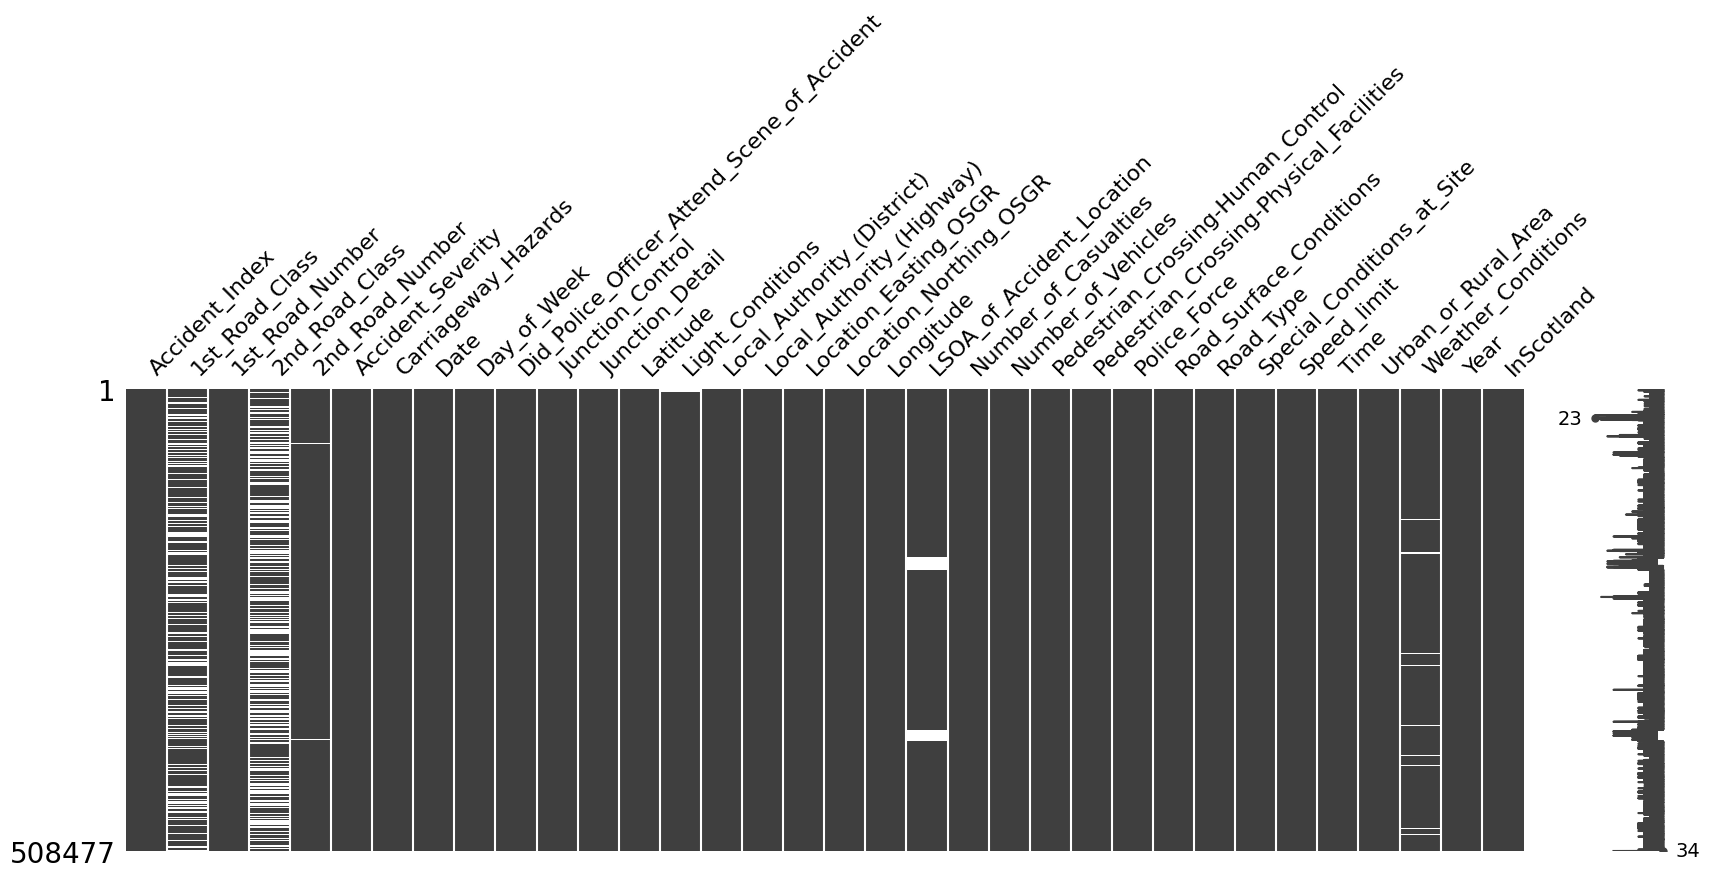

In [ ]:
import missingno as mno
mno.matrix(data, figsize=(20,6))
plt.show()

# Descriptive Statistics
- For Numerical Columns

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
1st_Road_Number,508475.0,1002.104524,1837.252901,0.000000,0.000000,113.000000,683.000000,9.999000e+03
2nd_Road_Number,503195.0,388.254911,1315.496798,0.000000,0.000000,0.000000,0.000000,9.999000e+03
Did_Police_Officer_Attend_Scene_of_Accident,508236.0,1.197206,0.407046,1.000000,1.000000,1.000000,1.000000,3.000000e+00
Latitude,508391.0,52.646450,1.360684,49.914513,51.528891,52.478955,53.492185,6.072468e+01
Location_Easting_OSGR,508391.0,441121.193747,91474.560385,66710.000000,382080.000000,437780.000000,521560.000000,6.552900e+05
Location_Northing_OSGR,508391.0,306446.389059,151046.891800,10520.000000,182690.000000,287240.000000,399700.000000,1.205100e+06
Longitude,508391.0,-1.411828,1.344414,-7.491830,-2.270198,-1.433859,-0.238154,1.758337e+00
Number_of_Casualties,508477.0,1.365259,0.826560,1.000000,1.000000,1.000000,1.000000,6.800000e+01
Number_of_Vehicles,508477.0,1.842272,0.719616,1.000000,1.000000,2.000000,2.000000,2.200000e+01
Pedestrian_Crossing-Human_Control,508460.0,0.008549,0.121223,0.000000,0.000000,0.000000,0.000000,2.000000e+00


For Categorical Column

In [ ]:
data.describe(include='object').T

,count,unique,top,freq
Accident_Index,508477,338263,2.00513E+12,7277
1st_Road_Class,359061,5,A,227601
2nd_Road_Class,296844,6,Unclassified,199458
Accident_Severity,508477,3,Slight,434715
Carriageway_Hazards,508454,6,None,498721
Date,508477,1095,21/10/2005,822
Day_of_Week,508477,7,Friday,84125
Junction_Control,508477,7,Give way or uncontrolled,244683
Junction_Detail,508477,10,Not at junction or within 20 metres,206711
Light_Conditions,506393,5,Daylight,366677


# Checking for Duplicate Entries

In [ ]:
data.duplicated().sum()

3

# Unique Values

In [ ]:
data.nunique().sort_values()

InScotland                                          2
Accident_Severity                                   3
Did_Police_Officer_Attend_Scene_of_Accident         3
Pedestrian_Crossing-Human_Control                   3
Urban_or_Rural_Area                                 3
Year                                                3
1st_Road_Class                                      5
Road_Surface_Conditions                             5
Light_Conditions                                    5
Road_Type                                           6
2nd_Road_Class                                      6
Carriageway_Hazards                                 6
Pedestrian_Crossing-Physical_Facilities             6
Day_of_Week                                         7
Junction_Control                                    7
Speed_limit                                         8
Weather_Conditions                                  8
Special_Conditions_at_Site                         10
Junction_Detail             

Handling Missing Values - Complete Case Analysis

In [ ]:
cols = [var for var in data.columns if data[var].isnull().mean().mean()<0.05 and data[var].isnull().mean()>0]
cols

['1st_Road_Number',
 '2nd_Road_Number',
 'Carriageway_Hazards',
 'Did_Police_Officer_Attend_Scene_of_Accident',
 'Latitude',
 'Light_Conditions',
 'Location_Easting_OSGR',
 'Location_Northing_OSGR',
 'Longitude',
 'Pedestrian_Crossing-Human_Control',
 'Pedestrian_Crossing-Physical_Facilities',
 'Road_Surface_Conditions',
 'Road_Type',
 'Special_Conditions_at_Site',
 'Speed_limit',
 'Time',
 'Urban_or_Rural_Area',
 'Weather_Conditions',
 'Year',
 'InScotland']

In [ ]:
data[cols].sample(7)

,1st_Road_Number,2nd_Road_Number,Carriageway_Hazards,Did_Police_Officer_Attend_Scene_of_Accident,Latitude,Light_Conditions,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,InScotland
448774,630.0,18.0,None,1.0,53.545937,Daylight,460890.0,405870.0,-1.082528,0.0,0.0,Dry,Roundabout,None,40.0,14:30,Urban,Fine no high winds,2007.0,No
436098,19.0,0.0,None,1.0,54.939218,Darkness - no lighting,433810.0,560630.0,-1.473785,0.0,0.0,Wet or damp,Dual carriageway,None,70.0,21:20,Rural,Raining no high winds,2007.0,No
58622,0.0,0.0,None,2.0,54.534707,Daylight,428530.0,515580.0,-1.560601,0.0,0.0,Dry,Single carriageway,None,30.0,07:35,Urban,Fine no high winds,2005.0,No
101887,6008.0,0.0,None,2.0,52.953540,Daylight,456870.0,339910.0,-1.154953,0.0,5.0,Dry,Dual carriageway,None,30.0,08:50,Urban,Fine no high winds,2005.0,No
121004,54.0,0.0,None,1.0,51.726311,Daylight,530580.0,204760.0,-0.110763,0.0,0.0,Wet or damp,Single carriageway,None,60.0,15:20,Rural,Raining no high winds,2005.0,No
99956,221.0,0.0,None,1.0,53.129058,Daylight,449910.0,359360.0,-1.255536,0.0,1.0,Wet or damp,Single carriageway,None,30.0,13:43,Urban,Fine no high winds,2005.0,No
365965,71.0,0.0,None,3.0,50.905146,Daylight,369270.0,111840.0,-2.438436,0.0,0.0,Dry,Single carriageway,None,60.0,09:20,Rural,Fine no high winds,2006.0,No


In [ ]:
len(data[cols].dropna()) / len(data)

0.9595478261553619

In [ ]:
new_df =data[cols].dropna()

In [ ]:
data.shape, new_df.shape

((508477, 34), (487908, 20))

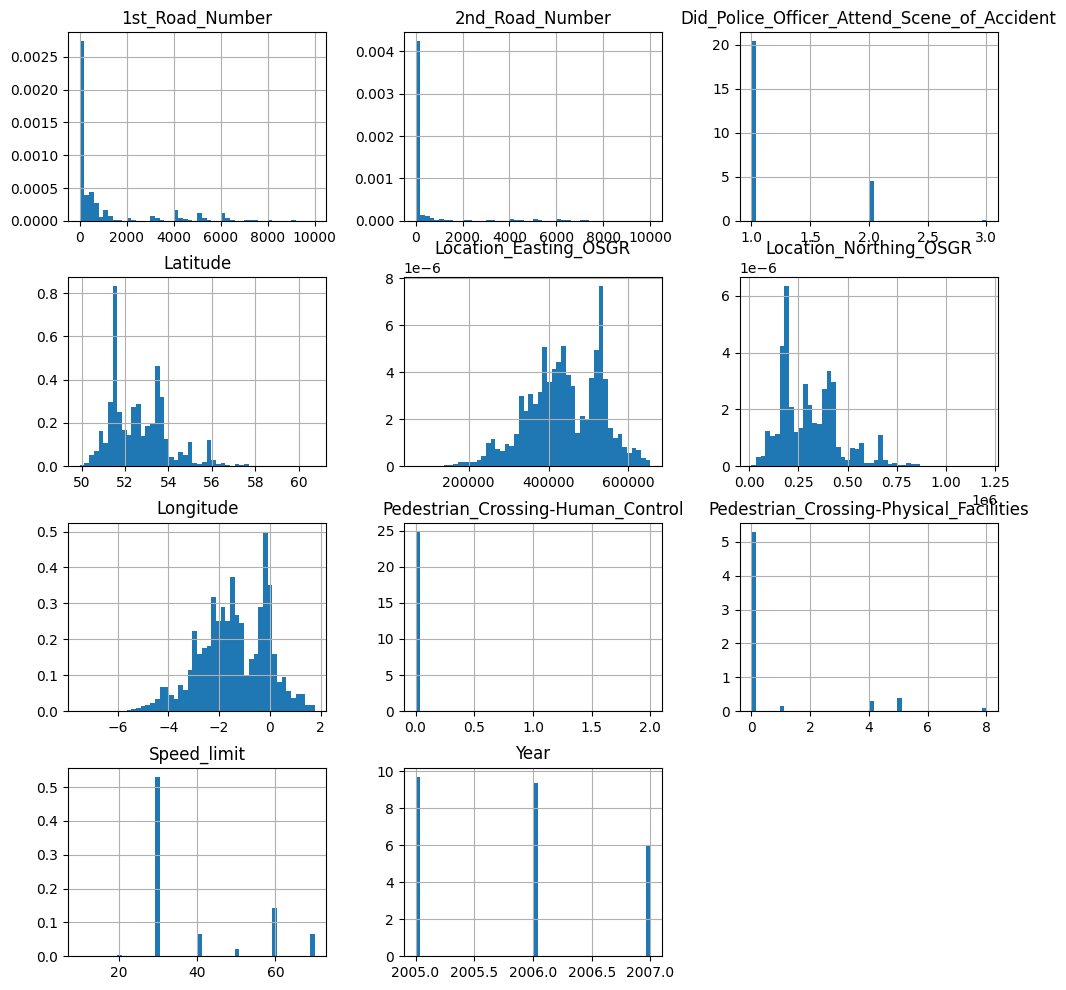

In [ ]:
new_df.hist(bins=50,density=True,figsize=(12,12))
plt.show()

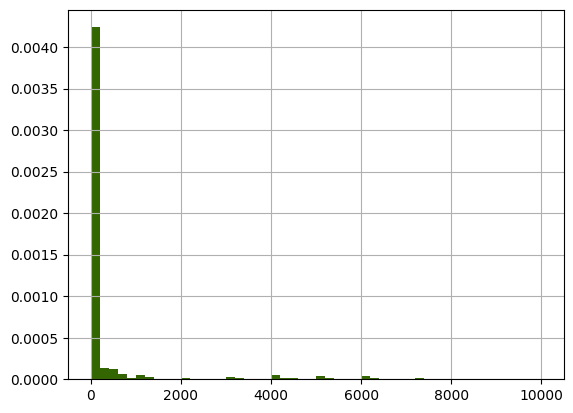

In [ ]:
fig =plt.figure()
ax=fig.add_subplot(111)
# Original data
data['2nd_Road_Number'].hist(bins=50,ax=ax,density=True,color='red')
#data after cca, the argument alpha makes the color transparent,so we can
# see the overlay of the 2 distributions
new_df['2nd_Road_Number'].hist(bins=50,ax=ax,color='green',density=True,alpha=0.8)
plt.show()

<Axes: ylabel='Density'>

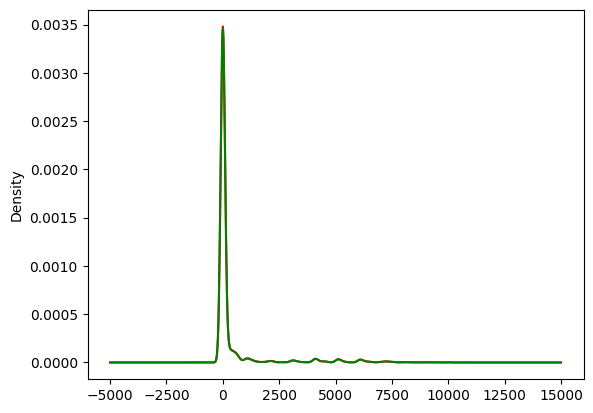

In [ ]:
fig=plt.figure()
ax= fig.add_subplot(111)
# original data
data['2nd_Road_Number'].plot.density(color='red')
# data after cca
new_df['2nd_Road_Number'].plot.density(color='green')

In [ ]:
temp =pd.concat([
    # percentage of observation per category, original data
    data['Light_Conditions'].value_counts()/len(data),
    # percentage of observations per category,cca data
    new_df['Light_Conditions'].value_counts()/len(new_df)],axis=1)
# add column names
temp.columns = ['original','cca']
temp

,original,cca
Daylight,0.721128,0.723757
Darkness - lights lit,0.205055,0.207945
Darkness - no lighting,0.057641,0.058456
Darkness - lighting unknown,0.007888,0.005630
Darkness - lights unlit,0.004189,0.004212
